In [ ]:
import os
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC, F1Score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications import MobileNetV2
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Path to your dataset folder
dataset_path = "/content/drive/MyDrive/PokemonData"

# Get all subfolders (Pokémon categories)
pokemon_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Count total folders
num_folders = len(pokemon_folders)

# Dictionary to store count per Pokémon
image_counts = {}
total_images = 0

# Count images in each subfolder
for folder in pokemon_folders:
    folder_path = os.path.join(dataset_path, folder)
    num_images = len(os.listdir(folder_path))  # Count images
    image_counts[folder] = num_images
    total_images += num_images

# Print results
print(f"Total Pokémon folders: {num_folders}")
print(f"Pokémon categories: {', '.join(pokemon_folders)}\n")
print(f"Total images across all folders: {total_images}\n")

for pokemon, count in image_counts.items():
    print(f"{pokemon}: {count} images")


Total Pokémon folders: 135
Pokémon categories: Wigglytuff, Weezing, Wartortle, Vulpix, Zapdos, Zubat, Voltorb, Weepinbell, Weedle, Vileplume, Staryu, Venusaur, Venonat, Victreebel, Tauros, Vaporeon, Tentacool, Tangela, Tentacruel, Venomoth, Spearow, Squirtle, Seadra, Slowbro, Snorlax, Shellder, Seaking, Starmie, Slowpoke, Seel, Raticate, Sandslash, Psyduck, Raichu, Rattata, Rhyhorn, Sandshrew, Scyther, Rhydon, Rapidash, Pidgey, Pinsir, Pidgeotto, Pikachu, Poliwhirl, Primeape, Poliwag, Porygon, Poliwrath, Ponyta, Persian, Pidgeot, Ninetales, Paras, Nidorino, Omanyte, Onix, Oddish, Omastar, Parasect, Metapod, Nidorina, Nidoqueen, Moltres, MrMime, Nidoking, Meowth, Mew, Mewtwo, Muk, Machoke, Lickitung, Machamp, Magmar, Magneton, Marowak, Magnemite, Mankey, Magikarp, Machop, Kakuna, Kangaskhan, Jynx, Lapras, Kingler, Koffing, Kadabra, Krabby, Kabuto, Kabutops, Hitmonlee, Jolteon, Hypno, Ivysaur, Jigglypuff, Hitmonchan, Growlithe, Horsea, Gyarados, Haunter, Gengar, Gastly, Graveler, Gloom, 

In [ ]:

# Track total images
total_images_after = 0
image_counts_after = {}

# Iterate over each Pokémon folder
for pokemon in os.listdir(dataset_path):
    pokemon_folder = os.path.join(dataset_path, pokemon)

    if os.path.isdir(pokemon_folder):
        images = sorted(os.listdir(pokemon_folder))
        image_count = 0

        # Loop through images and rename them
        for idx, image in enumerate(images, start=1):
            old_path = os.path.join(pokemon_folder, image)

            # Extract file extension (.jpg, .png, etc.)
            ext = os.path.splitext(image)[1]

            # Define new file name
            new_name = f"{pokemon}_{idx:03d}{ext}"
            new_path = os.path.join(pokemon_folder, new_name)

            # Rename file
            os.rename(old_path, new_path)
            image_count += 1

        # Store counts
        image_counts_after[pokemon] = image_count
        total_images_after += image_count

        print(f"Renamed {image_count} images in {pokemon_folder}")

# Print final results
print("Renaming complete!")
print(f"\ Total Pokémon folders: {len(image_counts_after)}")
print(f"Total images after renaming: {total_images_after}\n")

for pokemon, count in image_counts_after.items():
    print(f"📁 {pokemon}: {count} images")


Renamed 57 images in /content/drive/MyDrive/PokemonData/Wigglytuff
Renamed 50 images in /content/drive/MyDrive/PokemonData/Weezing
Renamed 48 images in /content/drive/MyDrive/PokemonData/Wartortle
Renamed 50 images in /content/drive/MyDrive/PokemonData/Vulpix
Renamed 52 images in /content/drive/MyDrive/PokemonData/Zapdos
Renamed 40 images in /content/drive/MyDrive/PokemonData/Zubat
Renamed 55 images in /content/drive/MyDrive/PokemonData/Voltorb
Renamed 43 images in /content/drive/MyDrive/PokemonData/Weepinbell
Renamed 49 images in /content/drive/MyDrive/PokemonData/Weedle
Renamed 56 images in /content/drive/MyDrive/PokemonData/Vileplume
Renamed 47 images in /content/drive/MyDrive/PokemonData/Staryu
Renamed 66 images in /content/drive/MyDrive/PokemonData/Venusaur
Renamed 47 images in /content/drive/MyDrive/PokemonData/Venonat
Renamed 49 images in /content/drive/MyDrive/PokemonData/Victreebel
Renamed 54 images in /content/drive/MyDrive/PokemonData/Tauros
Renamed 59 images in /content/dri

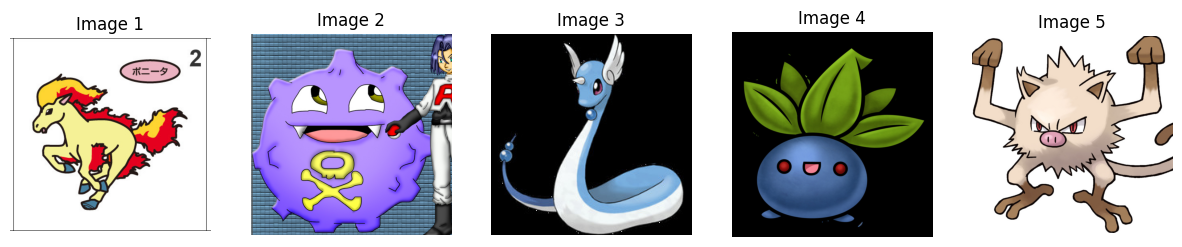

In [ ]:


# Collect all Pokémon subfolders
pokemon_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Get a list of all images from all Pokémon folders
all_images = []
for folder in pokemon_folders:
    folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(folder_path)
    for image in images:
        all_images.append(os.path.join(folder_path, image))

# Select 5 random images
random_images = random.sample(all_images, 5)

# Plot the images
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images, start=1):
    img = Image.open(image_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i}")

plt.show()


In [ ]:


dataset_path = "/content/drive/MyDrive/PokemonData/"

#  ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    horizontal_flip=True,
     vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Training data (80% of dataset)
train_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data (20% of dataset)
val_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5036 images belonging to 135 classes.
Found 1195 images belonging to 135 classes.


In [ ]:

import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the MobileNetV2 model (pre-trained)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the layers except last 30 trainable
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Define the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Additional Dense Layer
    layers.Dropout(0.5),
    layers.Dense(train_dataset.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy','val_loss',' val_accuracy']
)

# Print model summary
model.summary()

# early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("MobileNet.keras", monitor="val_loss", save_best_only=True)

# Train the model
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model
model.save("MobileNet.h5")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 135)                 │          34,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,079,879 (11.75 MB)

 Trainable params: 2,348,295 (8.96 MB)

 Non-trainable params: 731,584 (2.79 MB)

Epoch 1/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 1849s 12s/step - accuracy: 0.0074 - loss: 6.2096 - val_accuracy: 0.0285 - val_loss: 5.8604
Epoch 2/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.0239 - loss: 5.8682 - val_accuracy: 0.0703 - val_loss: 5.6065
Epoch 3/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.0647 - loss: 5.6115 - val_accuracy: 0.1289 - val_loss: 5.1947
Epoch 4/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.1145 - loss: 5.2533 - val_accuracy: 0.2017 - val_loss: 4.7187
Epoch 5/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.1697 - loss: 4.8274 - val_accuracy: 0.3305 - val_loss: 4.0731
Epoch 6/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.2269 - loss: 4.4078 - val_accuracy: 0.4661 - val_loss: 3.4509
Epoch 7/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.3118 - loss: 3.9111 - val_accuracy: 0.5573 - val_loss: 2.9463
Epoch 8/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.3781 - loss: 3.5488 - val_ac

In [ ]:

model.save("/content/drive/MyDrive/MobileNet.h5")

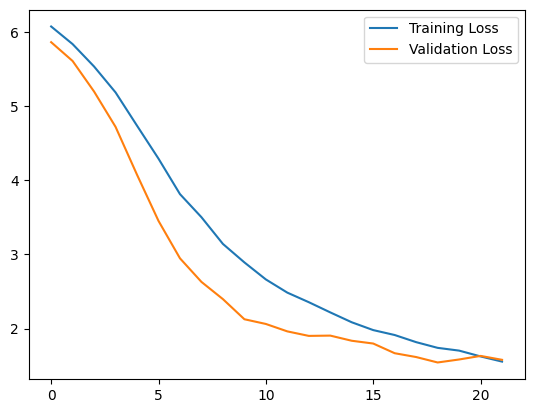

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Iterate over the validation dataset in batches
for batch_data, batch_labels in val_dataset:
    # Get true labels
    true_labels.extend(np.argmax(batch_labels, axis=1))

    # Get predictions from the model
    batch_preds = model.predict(batch_data)
    batch_preds = np.argmax(batch_preds, axis=1)

    # Store predictions
    predictions.extend(batch_preds)

    # If end of the validation dataset is reached, break out of the loop
    if len(predictions) >= len(val_dataset.filenames):
        break

# Generate classification report
print(classification_report(true_labels, predictions, target_names=val_dataset.class_indices.keys()))



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
